In [92]:
## AR autoRegression 用过去一段时间来线性拟合将要预测的数据

/Users/icdi/Desktop/py_ws/venv/lib/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


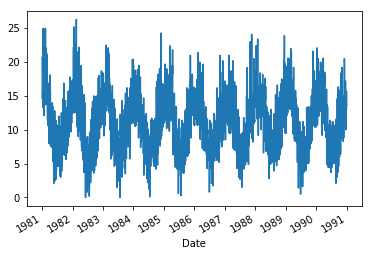

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
series = pd.Series.from_csv('data/daily-min-temperatures.csv',header = 0)
series.plot()

In [83]:
from pandas.plotting import lag_plot,autocorrelation_plot ## (x,y) -> (y[t-1],y[t])

![](img/autocorr.png)

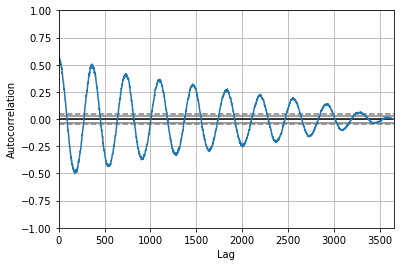

In [84]:
autocorrelation_plot(series)

3650


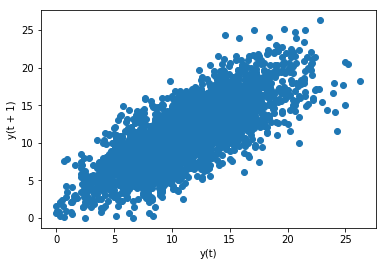

In [85]:
lag_plot(series)
print(len(series))

In [86]:
frame = pd.DataFrame(series.values)
from pandas import concat
dataframe = concat([frame.shift(1), frame],axis =1)
dataframe.corr() ##两个元素的相关系数

,0,0
0,1.00000,0.77487
0,0.77487,1.00000


Lag: 29
Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test MSE: 1.502


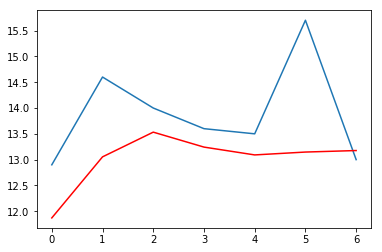

In [87]:
# AR 
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [88]:
from pandas.compat import range, lrange, lmap, zip

In [89]:
def autocorrelation_plot(series, ax=None, lag = None ,**kwds):
    """Autocorrelation plot for time series.

    Parameters:
    -----------
    series: Time series
    ax: Matplotlib axis object, optional
    lag: control the range of historial value
    kwds : keywords
        Options to pass to matplotlib plotting method

    Returns:
    -----------
    ax: Matplotlib axis object
    """
    import matplotlib.pyplot as plt
    if lag is not None:
        n = lag
    length = len(series)
    data = np.asarray(series)
    if ax is None:
        ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
    mean = np.mean(data)
    c0 = np.sum((data - mean) ** 2) / float(length)

    def r(h):
        return ((data[:length - h] - mean) *
                (data[h:] - mean)).sum() / float(length) / c0
    
    x = np.arange(n) + 1
    y = lmap(r, x)
    z95 = 1.959963984540054
    z99 = 2.5758293035489004
#     ax.axhline(y=z99 / np.sqrt(n), linestyle='--', color='grey')
#     ax.axhline(y=z95 / np.sqrt(n), color='grey')
#     ax.axhline(y=0.0, color='black')
#     ax.axhline(y=-z95 / np.sqrt(n), color='grey')
#     ax.axhline(y=-z99 / np.sqrt(n), linestyle='--', color='grey')
    ax.set_xlabel("Lag")
    ax.set_ylabel("Autocorrelation")
    ax.plot(x, y, **kwds)
    if 'label' in kwds:
        ax.legend()
    ax.grid()
    return ax

In [90]:
series = pd.Series.from_csv('data/DA_33.75_-85.75_2006_DPV_39MW_60_Min.csv',header = 0)

/Users/icdi/Desktop/py_ws/venv/lib/python3.5/site-packages/pandas/core/series.py:3727: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


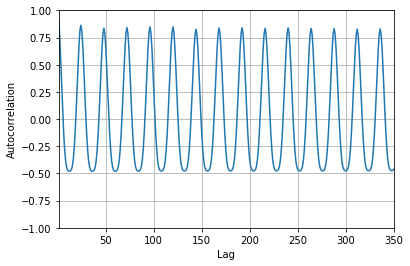

In [91]:
autocorrelation_plot(series,lag = 350)